In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# 正常显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示符号
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score

### Regression Method

In [96]:
#Linear Regression
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
#Decision Tree Regressor
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
#SVM Regressor
from sklearn import svm
model_SVR = svm.SVR()
#K Neighbors Regressor
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
#Random Forest Regressor
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
#Adaboost Regressor
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)
#Gradient Boosting Random Forest Regressor
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
#ExtraTree Regressor
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

## Data preprocessing
### Change the timestamp to minutes

In [2]:
data = pd.read_csv('./DataSets/DynamicBloodGlucoseData.csv',index_col=0)

In [3]:
data.head()

,blood_sugar,dateline
375740,12.0,1493360446
375741,12.0,1493360266
377965,12.4,1493436143
377968,12.4,1493436323
377970,12.4,1493436503


In [4]:
X_train = data['dateline'].values.reshape(-1, 1)

In [5]:
y_train = data['blood_sugar'].values

In [6]:
import time_transform
for i in range(len(X_train)):
    X_train[i] = int(time_transform.stamp2str(X_train[i],strTimeFormat="%H%M"))

### 一元线性回归（Change the timestamp to minutes）

Text(0,0.5,'blood glucose value')

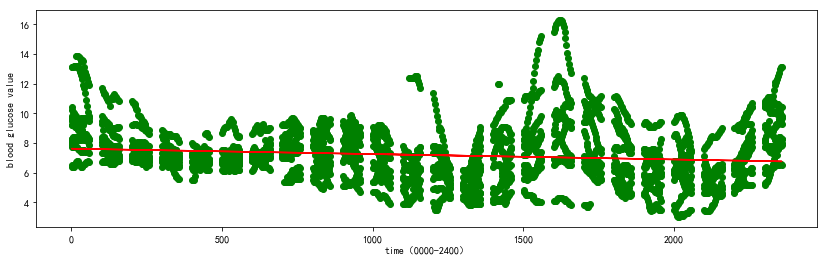

In [7]:
from sklearn import linear_model
import matplotlib.pyplot as plt
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
plt.figure(figsize=(14,4))
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, y_pred, color='r')
plt.xlabel('time（0000-2400）')
plt.ylabel('blood glucose value')

### Model training prediction process definition

In [85]:
def try_different_method2(regr):
    pf = PolynomialFeatures(degree=7)
    regr.fit(pf.fit_transform(X_train),y_train)
    X_predict = np.linspace(0, 2400, 1440)
    X_predict_result = regr.predict(pf.transform(X_predict.reshape(X_predict.shape[0], 1)))
    plt.figure(figsize=(14,4))
    plt.scatter(X_train, y_train, color='g')
    plt.plot(X_predict, X_predict_result, 'r-')
    plt.xlabel('time（0-24）')
    plt.ylabel('blood glucose value')

### start

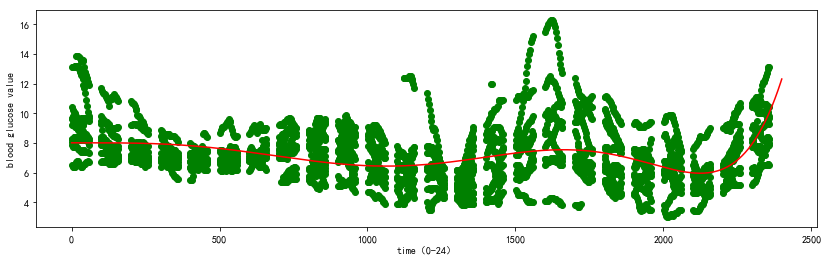

In [87]:
try_different_method2(model_LinearRegression)

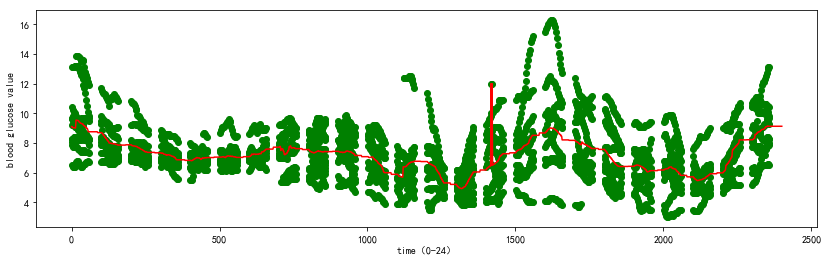

In [88]:
try_different_method2(model_DecisionTreeRegressor)

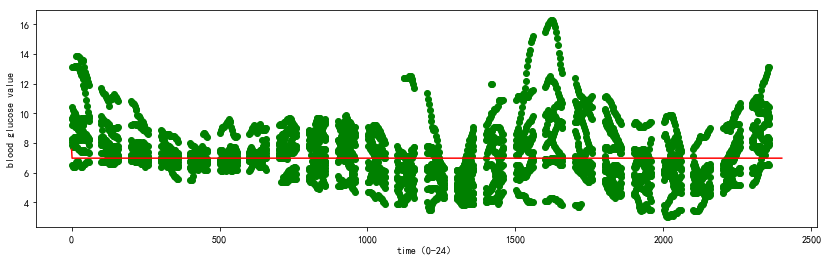

In [89]:
try_different_method2(model_SVR)

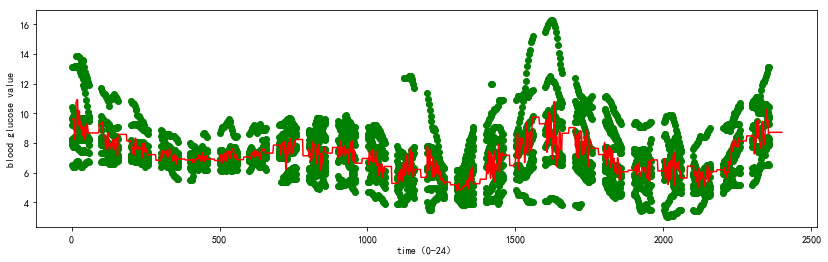

In [90]:
try_different_method2(model_KNeighborsRegressor)

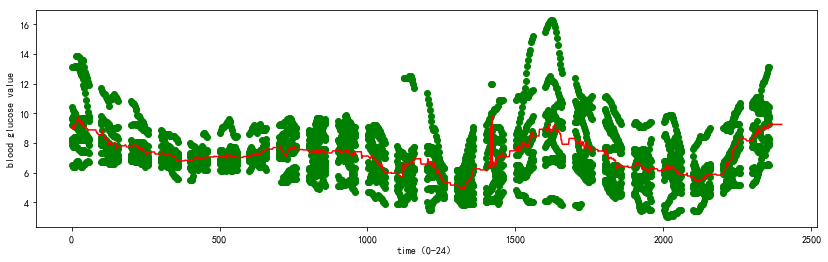

In [104]:
try_different_method2(model_RandomForestRegressor)

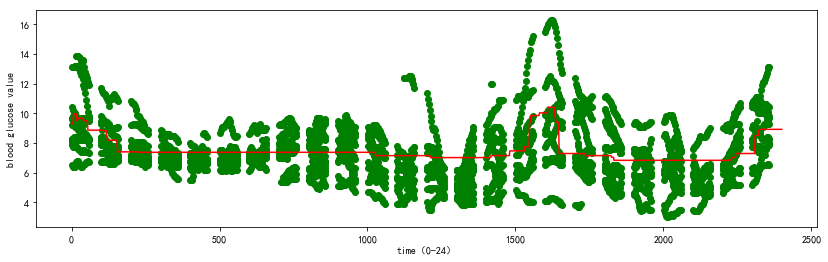

In [92]:
try_different_method2(model_AdaBoostRegressor)

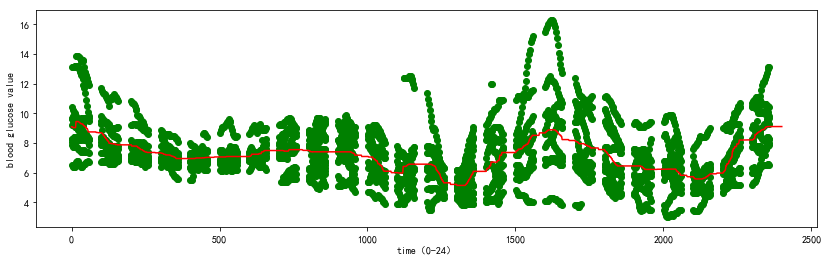

In [93]:
try_different_method2(model_GradientBoostingRegressor)

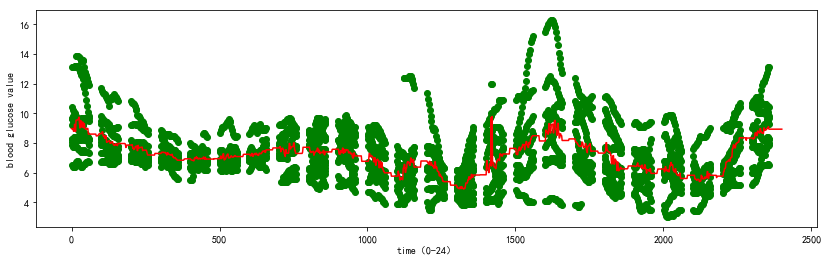

In [94]:
try_different_method2(model_BaggingRegressor)

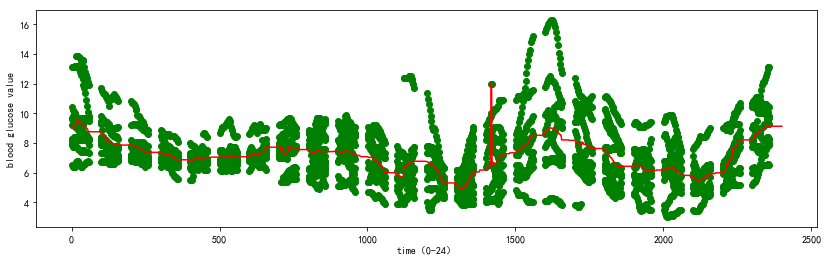

In [95]:
try_different_method2(model_ExtraTreeRegressor)